# Homework 12 Two
Rylan Fowers

In [14]:
from scipy.stats import norm
from scipy.stats import linregress as LR
from scipy.stats import invgamma
from scipy.stats import gamma
from scipy.special import gamma as g
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles as q
import seaborn as sbn
import random
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

## Problem 1

In [15]:
heart_rate = [94, 96, 94, 95, 104, 106, 108, 113, 115, 121, 131]
oxygen_uptake = [0.47, 0.75, 0.83, 0.98, 1.18, 1.29, 1.40, 1.60, 1.75, 1.90, 2.23]

$y_{i} = \beta _{0} + \beta_{1}x_{i} + \epsilon_{i}$ with $\epsilon_{i} \sim N(0, \sigma^{2})$

### (a)

Linear relationship.
Multivariate normality.
No or little multicollinearity.
No auto-correlation.
Homoscedasticity.

### (b)

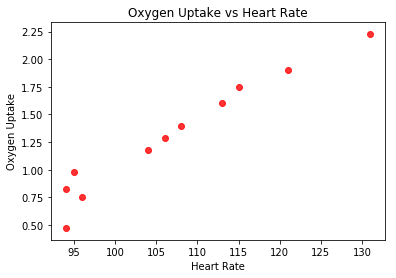

In [16]:
plt.scatter(heart_rate, oxygen_uptake, alpha=.8, color='r')
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Uptake")
plt.title("Oxygen Uptake vs Heart Rate")
plt.show()

### (c)

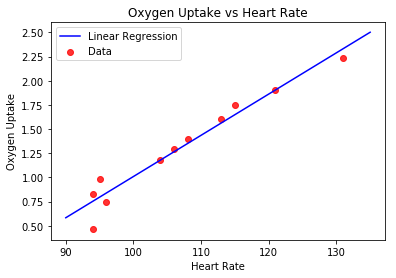

2.5046471229304315e-07

In [17]:
x=np.linspace(90,135, 1000)
slope, intercept, rvalue, pvalue, stderr = LR(heart_rate, oxygen_uptake)
plt.scatter(heart_rate, oxygen_uptake, alpha=.8, color='r', label="Data")
plt.plot(x, slope*x + intercept, label="Linear Regression", color='b')
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Uptake")
plt.title("Oxygen Uptake vs Heart Rate")
plt.legend()
plt.show()

pvalue/2 #Make one sided

### (d)

Because the p-value (shown above) is less than .05, we can conclude are results are statistically significant and that heart rate is correlated with oxygen uptake.

### (e)

You should always explore the appropriateness of the assumptions that accompany the model, but I won’t
have you explore them for this homework.

$y_{i}|\beta _{0},\beta_{1},\sigma^{2}, x_{i} \sim N(\beta _{0} + \beta_{1}x_{i}, \sigma^{2})$

### (f)

The normal assumptions we have for bayesian statistics, but also...
Linear relationship.
Multivariate normality.
No or little multicollinearity.
No auto-correlation.
Homoscedasticity.

### (g)

$\pi(\sigma^{2}|\beta _{0},\beta_{1}, y_{1},...,y_{n})\propto
f(y_{1}, y_{2},...y_{n}, \beta_{0}, \beta_{1} | \sigma^{2} ) \pi(\sigma^{2})$


<br><br>$\implies \frac{b^{a}}{\Gamma (a)} (\sigma^{2})^{-(a+1)} exp\{-\frac{b}{\sigma^{2}}\} (\frac{1}{\sqrt{2\pi}})^{n} (\sigma^{2})^{\frac{-n}{2}} exp\{-\frac{1}{2\sigma^{2}} \sum_{i=1}^{n} (y_{i} - (\beta_{0}+\beta_{1}x_{i}))^{2}\}$


<br><br>$\implies \propto (\sigma^{2})^{-(a+\frac{n}{2}+1)} exp\{-\frac{1}{\sigma^{2}}(b + \frac{1}{2}\sum_{i=1}^{n}[y_{i}-(\beta_{0}+\beta_{1}x_{i})]^{2})\}$

<br><br>
$\implies IG\Big(a+\frac{n}{2},\frac{1}{2}\sum_{i=1}^{n}[y_{i}-(\beta_{0}+\beta_{1}x_{i})]^{2}) + b \Big)$ as desired. $\blacksquare$

### (h)

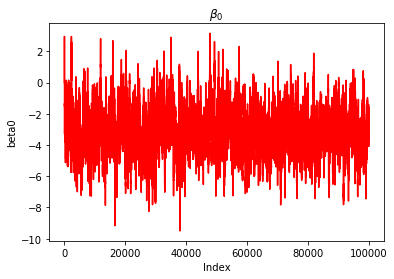

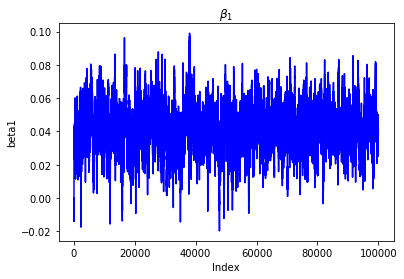

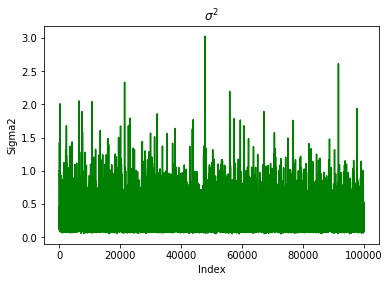

In [37]:
m0 = 0
m1 = 0
v0 = 100
v1 = 100
a = 1
b = 1

#Empty vectors to hold MCMC iterates
N=100000
beta0 = np.zeros(N)
beta1 = np.zeros(N)
sig2 = np.zeros(N)

#Starting values 
Y = np.array(oxygen_uptake)
X = np.array(heart_rate)
n = len(Y)
beta0[0] = 0
beta1[0] = 0
sig2[0] = 1
sumx2 = sum(X**2)


for j in range(1, N):
    #Update Beta 0
    vstar = 1/(n/sig2[j-1] + 1/v0)
    mstar = (vstar)*((1/sig2[j-1])*sum(Y-beta1[j-1]*X) + (1/v0)*m0)
    beta0[j] = np.random.normal(mstar, np.sqrt(vstar), 1)
    
    #Update Beta 1
    vstar = 1/(sumx2/sig2[j-1] + 1/v1)
    mstar = (vstar)*((1/sig2[j-1])* sum(X*(Y-beta0[j])) + (1/v1)*m1)
    beta1[j] = np.random.normal(mstar, np.sqrt(vstar), 1)
    
    #Update Sigma 2
    astar = a + 0.5*n
    bstar = 0.5*np.sum((Y - (beta0[j] + beta1[j]*X))**2) + b
    sig2[j] = 1/np.random.gamma(astar, scale=1/bstar, size =1)
    
    
index=np.arange(0,N,1)
plt.plot(index, beta0, color='r')
plt.title("$\\beta_{0}$")
plt.xlabel("Index")
plt.ylabel("beta0")
plt.show()

plt.plot(index, beta1, color='b')
plt.title("$\\beta_{1}$")
plt.xlabel("Index")
plt.ylabel("beta1")
plt.show()

plt.plot(index, sig2, color='g')
plt.title("$\sigma^{2}$")
plt.xlabel("Index")
plt.ylabel("Sigma2")
plt.show()

### (i)

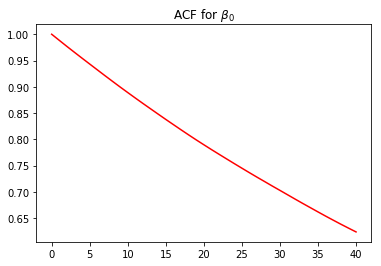

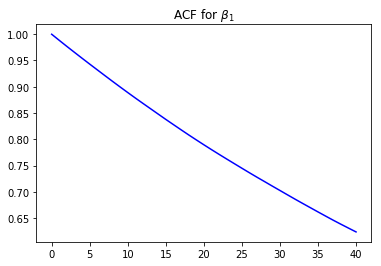

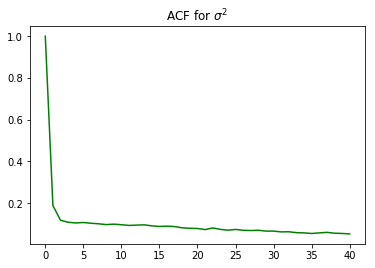


Now, remove burn-in draws


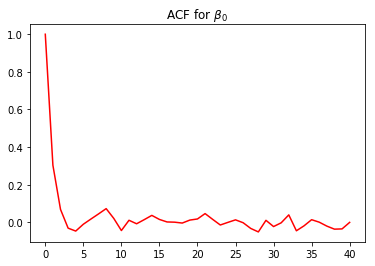

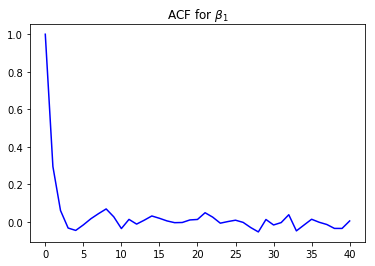

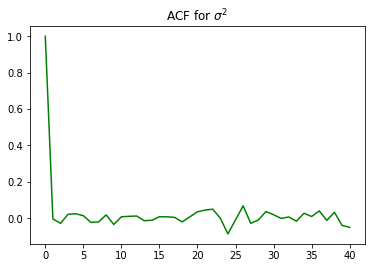

In [26]:
plt.plot(acf(beta0), color='r')
plt.title("ACF for $\\beta_{0}$")
plt.show()

plt.plot(acf(beta1), color='b')
plt.title("ACF for $\\beta_{1}$")
plt.show()

plt.plot(acf(sig2), color='g')
plt.title("ACF for $\sigma^{2}$")
plt.show()

print("\nNow, remove burn-in draws")
#Remove burns by only plotting every 100
plt.plot(acf(beta0[0:-1:100]), color='r') 
plt.title("ACF for $\\beta_{0}$")
plt.show()

plt.plot(acf(beta1[0:-1:100]), color='b')
plt.title("ACF for $\\beta_{1}$")
plt.show()

plt.plot(acf(sig2[0:-1:100]), color='g')
plt.title("ACF for $\sigma^{2}$")
plt.show()


### (j)

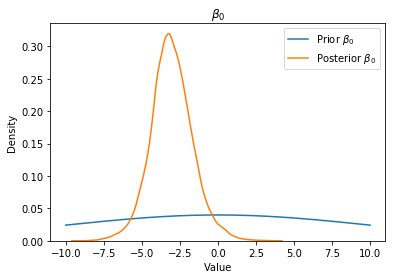

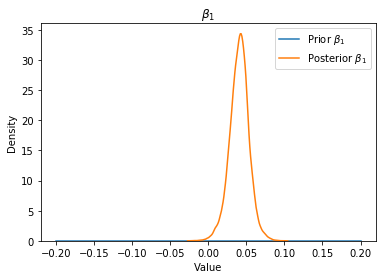

In [27]:
prior_beta0 = lambda x: norm.pdf(x, m0, np.sqrt(v0))
prior_beta1 = lambda x: norm.pdf(x, m1, np.sqrt(v1))
prior_sig2 = lambda x: invgamma.pdf(x, a, np.sqrt(b))

x = np.linspace(-10,10,1000)
plt.plot(x, prior_beta0(x), label='Prior $\\beta_{0}$')
sbn.distplot(beta0, hist=False, label='Posterior $\\beta_{0}$')
plt.legend()
plt.ylabel("Density")
plt.xlabel("Value")
plt.title("$\\beta_{0}$")
plt.show()

x = np.linspace(-.2,.2, 1000)
plt.plot(x, prior_beta1(x), label='Prior $\\beta_{1}$')
sbn.distplot(beta1, hist=False, label='Posterior $\\beta_{1}$')
plt.legend()
plt.ylabel("Density")
plt.xlabel("Value")
plt.title("$\\beta_{1}$")
plt.show()

### (k)

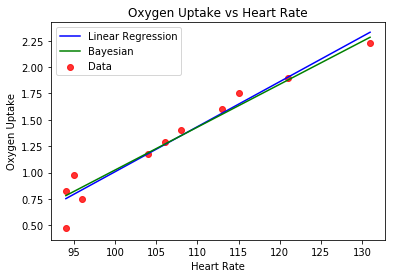

In [28]:
x=np.linspace(min(heart_rate),max(heart_rate), 1000)
slope, intercept, rvalue, pvalue, stderr = LR(heart_rate, oxygen_uptake)
plt.scatter(heart_rate, oxygen_uptake, alpha=.8, color='r', label="Data")
plt.plot(x, slope*x + intercept, label="Linear Regression", color='b')
plt.plot(x, np.mean(beta0)+ np.mean(beta1)*x, label="Bayesian", color='g')
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Uptake")
plt.title("Oxygen Uptake vs Heart Rate")
plt.legend()
plt.show()

### (l)

In [34]:
print("Beta0 confidence interval:", q(beta0, [.025, .975]))
print("Beta1 confidence interval:", q(beta1, [.025, .975]))

Beta0 confidence interval: [-5.72618259 -0.12436408]
Beta1 confidence interval: [0.01353588 0.06552618]


Hypothesis testing for bayesian. We do this by observing the posterior distributions. Note in the above code we have that $\beta_{0}$ does not contain 0, so this means the slope must be negative and it is statistically signficant. Also, the $\beta_{1}$ interval also does not contain 0, so the result must be statitically significant that heart rate is correlated with oxygen uptake.

### (m)

Support: $(0, \infty)$ 

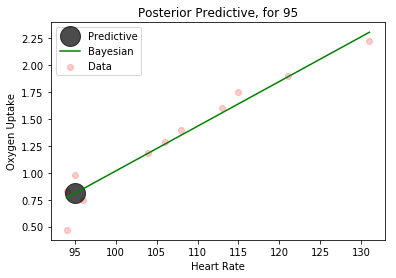

0.80882561150655


In [52]:
new = 95
pred = np.mean(beta0)+ np.mean(beta1)*new
post_pred = lambda x: 1/np.sqrt(2*np.pi) * (bstar**astar)/g(astar) * (g(astar+.5)/(bstar+(x-220)**2)**(astar+.5))
#plt.plot(x, post_pred(x))
plt.plot(new, pred, 'o', markersize=20, color='k', label='Predictive', alpha=.7)
plt.scatter(heart_rate, oxygen_uptake, alpha=.2, color='r', label="Data")
plt.plot(x, np.mean(beta0)+ np.mean(beta1)*x, label="Bayesian", color='g')
plt.xlabel("Heart Rate")
plt.ylabel("Oxygen Uptake")
plt.title("Posterior Predictive, for 95")
plt.legend()
plt.show()


print(np.mean(beta0)+ np.mean(beta1)*new)